In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
file_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df1 = pd.read_csv(file_url)
# display(df1)

print(df1.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [21]:
import math

class PlainPlot:
    def __init__(self, df, yName, xNames=None, FIGSIZE=(16,10), HSPACE=0.4, WSPACE=0.4, MAXWIDTH=4):
        self.FIGSIZE = FIGSIZE
        self.HSPACE = HSPACE
        self.WSPACE = WSPACE
        self.MAXWIDTH = MAXWIDTH

        self.yName = yName
        self.xNames = xNames if xNames is not None else [column for column in df.columns if column != yName]
        self.df = df
        self.funcs = {
            "identity": lambda x: x,
            #"square": lambda x: x**2 if not isinstance(x, str) else x,
            #"ln": lambda x: math.log(x) if not isinstance(x, str) and x > 0 else x,
            #"logit": lambda x: math.log(x/(1-x)) if not isinstance(x, str) and x > 0 and x < 1 else x,
            #"logistic": lambda x:10/(1 + math.exp(-5*(x-2)))
        }
    
    def plotAllGraphs(self, xNames=None, funcNames=None):
        fig = plt.figure(figsize=self.FIGSIZE)
        fig.subplots_adjust(hspace=self.HSPACE, wspace=self.WSPACE)
        if xNames is None:
            xNames = self.xNames
        if funcNames is None:
            funcNames = self.funcs.keys()
        
        count = 0
        for i, xName in enumerate(xNames):
            for j, name in enumerate(funcNames):
                count += 1
                w = min(len(xNames), self.MAXWIDTH)
                h = max(1, (len(xNames)*len(funcNames) // w)+1)
                subplotParams = (h, w, count)
                func = self.funcs[name]
                self.plotGraph(xName, func, name, fig, subplotParams)
        plt.show()
    
    def plotGraph(self, xName, func, funcName, fig, subplotParams):
        currData = pd.DataFrame(self.df[xName].apply(func))

        df = currData.join(self.df[self.yName])
        
        ax = fig.add_subplot(*subplotParams)
        sns.scatterplot(
            data=df,
            y=self.yName,
            x=xName
        ).set(
            ylabel=funcName + ": " + self.yName,
            xlabel=xName
        )

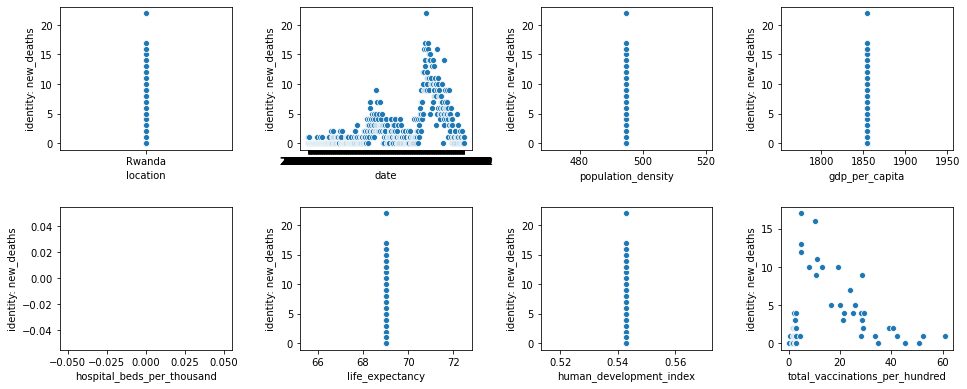

In [22]:
pd.reset_option("display.max_rows")
#total_deaths_per_million
#columnsOfInterest = ["total_deaths_per_million", "total_vaccinations_per_hundred"]

columnsOfInterest = ['location', 'date', "new_deaths",
                     'population_density', 'gdp_per_capita', 'hospital_beds_per_thousand',
                     'life_expectancy', 'human_development_index', 'total_vaccinations_per_hundred']

rw = df1.loc[df1["location"] == "Rwanda"]

df1_interest = rw.loc[:, columnsOfInterest]


q = PlainPlot(df1_interest, "new_deaths")
q.plotAllGraphs()

In [24]:


countryNames = pd.unique(df1["location"])
countryDFList = [df1.loc[df1["location"] == country] for country in countryNames]
countryDict = dict(zip(countryNames, countryDFList))

missingFactorsByCountry = {}
for countryName, countryDF in countryDict.items():
    temp = {}
    for targetColumn in countryDF.columns[countryDF.isnull().any()]:
        if targetColumn in columnsOfInterest:
            temp[targetColumn] = countryDF[targetColumn].isna().sum()
    missingFactorsByCountry[countryName] = temp
    
numberOfCountriesMissingFactors = {}
for country, missingDict in missingFactorsByCountry.items():
    for factor in missingDict.keys():
        if numberOfCountriesMissingFactors.get(factor, None) is None:
            numberOfCountriesMissingFactors[factor] = 1
        else:
            numberOfCountriesMissingFactors[factor] += 1


            
#resMerged.to_csv(r'C:\Users\drago\2DRandomCSVs\export_dataframe.csv', index = False, header=True)
resMerged
#######################################################################################
# DANGEROUS, DO NOT DO -- COUNTRIES WILL HAVE VALUES PROPAGATED FROM PREVIOUS COUNTRIES
# df1_featuresFilledNAN1 = df1_features.fillna(method="ffill")
# df1_featuresFilledNAN2 = df1_featuresFilledNAN1.fillna(0)
#######################################################################################

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,...,0.0,0.0,37.746,0.50,64.83,0.511,0.0,0.0,0.0,0.0
1,637,AFG,Asia,Afghanistan,2021-11-22,156911.0,15.0,43.000,7365.0,0.0,...,0.0,0.0,37.746,0.50,64.83,0.511,0.0,0.0,0.0,0.0
2,638,OWID_AFR,0,Africa,2020-02-13,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
3,1286,OWID_AFR,0,Africa,2021-11-22,8586545.0,3267.0,3332.857,221718.0,118.0,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.0
4,1287,ALB,Europe,Albania,2020-02-25,0.0,0.0,0.000,0.0,0.0,...,7.1,51.2,0.000,2.89,78.57,0.795,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,133877,YEM,Asia,Yemen,2021-11-22,9961.0,6.0,3.571,1939.0,1.0,...,7.6,29.2,49.542,0.70,66.12,0.470,0.0,0.0,0.0,0.0
470,133878,ZMB,Africa,Zambia,2020-03-18,2.0,2.0,0.000,0.0,0.0,...,3.1,24.7,13.938,2.00,63.89,0.584,0.0,0.0,0.0,0.0
471,134492,ZMB,Africa,Zambia,2021-11-22,210073.0,3.0,11.000,3667.0,0.0,...,3.1,24.7,13.938,2.00,63.89,0.584,0.0,0.0,0.0,0.0
472,134493,ZWE,Africa,Zimbabwe,2020-03-20,1.0,1.0,0.000,0.0,0.0,...,1.6,30.7,36.791,1.70,61.49,0.571,0.0,0.0,0.0,0.0


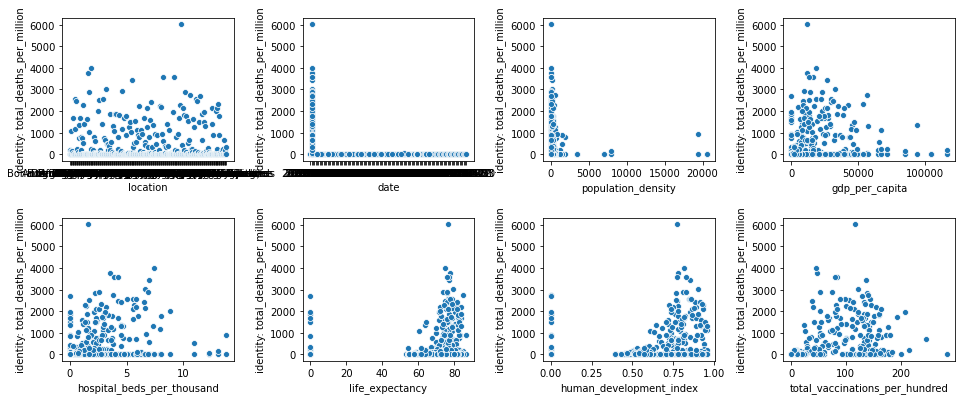

In [26]:
pd.reset_option("display.max_rows")
#total_deaths_per_million
#columnsOfInterest = ["total_deaths_per_million", "total_vaccinations_per_hundred"]

columnsOfInterest = ['location', 'date', "total_deaths_per_million",
                     'population_density', 'gdp_per_capita', 'hospital_beds_per_thousand',
                     'life_expectancy', 'human_development_index', 'total_vaccinations_per_hundred']

rw = df1.loc[df1["location"] == "Rwanda"]

df1_interest = resMerged.loc[:, columnsOfInterest]


q = PlainPlot(df1_interest, "total_deaths_per_million")
q.plotAllGraphs()

In [27]:
class LinearRegression:
    def __init__(self, name, df, yName, xNames, learningIncrement, numIter, transformDict=None):
        self.name = name
        self.df = df
        self.yName = yName
        self.xNames = xNames
        self.learningIncrement = learningIncrement
        self.numIter = numIter
        self.transformDict = transformDict

        self.initMatrices()

        self.bestFitY = None
        self.latestTestResult = None
        self.bsHistory = []
        self.costHistory = []
    
    def prepareFeatures(self, df_features):
        res = df_features.to_numpy()
        res = np.insert(res, 0, 1, axis=1)
        return res

    def initBs(self):
        self.bs = np.ones((self.xs.shape[1], 1))

    def transform(self):
        for columnName, func in self.transformDict.items():
            if columnName == self.yName:
                self.y = np.apply_along_axis(func, 0, self.y)
            elif columnName in self.xNames:
                index = self.xNames.index(columnName)+1 # weird +1 because of initial column of rows
                #print(self.xs)
                print(np.apply_along_axis(np.vectorize(func), 0, self.xs[:, index]))
                self.xs = np.insert(self.xs, index+1, np.apply_along_axis(np.vectorize(func), 0, self.xs[:, index]), axis = 1)
                #print(self.xs)
                self.initBs()
            else:
                raise ValueError("Column name unrecognized!")        

    def initMatrices(self):
        self.xs = self.df[self.xNames]
        self.xs = self.prepareFeatures(self.xs)
        self.y = self.df[[self.yName]].to_numpy()
        self.initBs()
        self.transform()
    
    def performRegression(self):
        def compute_cost():
            yHat = np.matmul(self.xs, self.bs)
            m = self.y.shape[0]
            #print(yHat, m)
            cost = (1/(2*m)) * sum(
                np.matmul(
                    (yHat-self.y).transpose(),
                    (yHat-self.y)
                )
            )
            return cost
        def incrementBs():
            return self.bs - self.learningIncrement*(1/len(self.xs))*(np.matmul(
                self.xs.transpose(),
                np.matmul(
                    self.xs,
                    self.bs
                ) - self.y
            ))

        for _ in range(self.numIter):
            self.costHistory.append(compute_cost())
            self.bsHistory.append(self.bs)
            self.bs = incrementBs()
        self.bestFitY = np.matmul(self.xs, self.bs)
 
    def prepareTestSection(self, testSection):
        cols = list(testSection.columns)
        testSection_features = testSection[self.xNames]
        testSection_features = self.prepareFeatures(testSection_features)
        for columnName, func in self.transformDict.items():
            index = cols.index(columnName)+1
            testSection_features = np.insert(testSection_features, index+1, np.apply_along_axis(func, 0, testSection_features[:, index]), axis = 1)
        return testSection_features
    
    def predict(self, testSection):
        testSection = self.prepareTestSection(testSection)
        return np.matmul(testSection, self.bs)

    def getHistories(self):
        return self.bsHistory, self.costHistory
    
    def getJoinedDF(self):
        res = self.df.copy().join(
            pd.Series(self.bestFitY.copy().flatten(), name="BESTFITLINE")
        )
        return res

In [37]:
columnsOfInterest = ['total_deaths_per_million', 'total_vaccinations_per_hundred']

columnsOfInterest = ["total_deaths_per_million",
                     'population_density', 'gdp_per_capita', 'hospital_beds_per_thousand',
                     'life_expectancy', 'human_development_index', 'total_vaccinations_per_hundred']

"""sns.scatterplot(
    y=resMerged["total_deaths_per_million"],
    x=resMerged["population_density"]
)"""

featureColumns = [column for column in columnsOfInterest if column != "total_deaths_per_million"]
print(featureColumns)
#af = df1.loc[df1["location"] == "Afghanistan"]
df1_interest = resMerged.loc[:, columnsOfInterest]

import statistics
nd = statistics.NormalDist(mu=1000, sigma=500)
rgs = LinearRegression("test", df1_interest, "total_deaths_per_million", featureColumns, 0.000000003, 1000000, {
    "total_vaccinations_per_hundred": lambda x:nd.pdf(x)
})

rgs.performRegression()
df_BFL = rgs.getJoinedDF()
print(df_BFL)
#print(rgs.bsHistory)
#print(df_BFL[["BESTFITLINE", "total_deaths_per_million"]])

['population_density', 'gdp_per_capita', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'total_vaccinations_per_hundred']
[0.00010798 0.00011241 0.00010798 0.0001153  0.00010798 0.0001422
 0.00010798 0.00011942 0.00010798 0.00017875 0.00010798 0.00011962
 0.00010798 0.0001732  0.00010798 0.00016775 0.00010798 0.00018473
 0.00010798 0.00012507 0.00011874 0.00018834 0.00010798 0.00016472
 0.00010798 0.00018751 0.00010798 0.00018369 0.00010798 0.00015829
 0.00010798 0.00014104 0.00010798 0.00019684 0.00010798 0.00013239
 0.00010798 0.00015782 0.00010798 0.00013639 0.00010798 0.00018589
 0.00010798 0.00015771 0.00010798 0.00010932 0.00010798 0.00019667
 0.00010798 0.00018633 0.00010798 0.00014041 0.00012057 0.00017901
 0.00010798 0.00013004 0.00010798 0.00013239 0.00010798 0.0001813
 0.00013094 0.00016586 0.00010798 0.00019761 0.00010798 0.00012935
 0.00010798 0.00010932 0.00010798 0.00010799 0.00010798 0.00019962
 0.00010798 0.00010895 0.00010798 0.00019295 0.

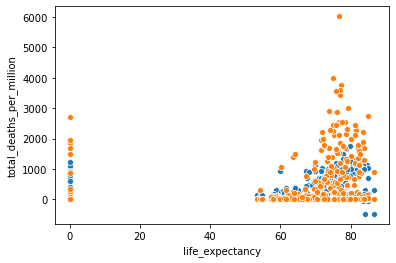

In [36]:
sns.scatterplot(
    data=df_BFL,
    y="BESTFITLINE",
    x="life_expectancy"
)

sns.scatterplot(
    data=df_BFL,
    y="total_deaths_per_million",
    x="life_expectancy"
)

In [9]:
pd.concat((df1_featuresFilledNAN1, df1_featuresFilledNAN2)).drop_duplicates(keep=False)

NameError: name 'df1_featuresFilledNAN1' is not defined

In [ ]:
pd.set_option("display.max_rows", 1000)
display(
    pd.concat((filledNANDict["Uganda"]["ffill"], filledNANDict["Uganda"]["ffill->0"])).drop_duplicates(keep=False)
)

In [ ]:
resMerged